In [1]:
import os, numpy as np, histogram.hdf as hh, histogram as H
from matplotlib import pyplot as plt
from multiphonon import sqe as mphsqe
%matplotlib notebook

/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
here = os.path.abspath('.')

In [3]:
datadir = os.path.join(here, '..', 'tests', 'data', 'graphite')
doshist = hh.load(os.path.join(datadir, 'exp_DOS.h5'))

In [4]:
from mcvine.phonon.powderSQE import use_phonopy
reload(use_phonopy)

<module 'mcvine.phonon.powderSQE.use_phonopy' from '/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/mcvine/phonon/powderSQE/use_phonopy.pyc'>

# Ei=30

In [8]:
reload(use_phonopy)

<module 'mcvine.phonon.powderSQE.use_phonopy' from '/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/mcvine/phonon/powderSQE/use_phonopy.py'>

In [9]:
%%time
IQEhist_Ei_30_T_300 = use_phonopy.from_FORCE_CONSTANTS(
    datadir,
    Ei = 30., # meV 
    T=300., # kelvin  
    doshist = doshist, # DOS histogram 
    Q_bins = np.arange(0, 4, 0.04), E_bins = np.arange(0, 30, .2),
    workdir = '_tmp.graphite-Ei_30-T_300', N=int(1e6), include_multiphonon=False,
    max_det_angle=60.,
)

Running phonopy...  * Discarding negative freqencies
* Fixing polarizations
Done

100%|██████████| 12/12 [00:10<00:00,  1.21it/s]

CPU times: user 31min 17s, sys: 48min 48s, total: 1h 20min 5s
Wall time: 7min 9s



/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/ndarray/NumpyNdArray.py:149: RuntimeWarning: invalid value encountered in divide
  if isNdArray( other ): self._numarr /= other.asNumarray()
/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/ndarray/NumpyNdArray.py:124: RuntimeWarning: divide by zero encountered in divide
  r._numarr = other/self._numarr
/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/ndarray/NumpyNdArray.py:142: RuntimeWarning: invalid value encountered in multiply
  if isNdArray( other ): self._numarr *= other.asNumarray()
/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/ndarray/NumpyNdArray.py:149: RuntimeWarning: divide by zero encountered in divide
  if isNdArray( other ): self._numarr /= other.asNumarray()


plot z in (0, 0.001)


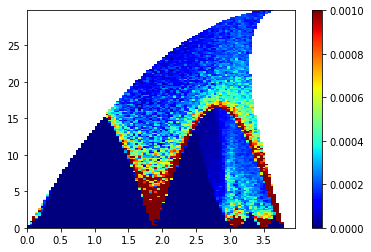

In [11]:
H.plot(IQEhist_Ei_30_T_300, min=0, max=1e-3, cmap='jet')

# Ei=55

In [14]:
%%time
IQEhist_Ei_55_T_300 = use_phonopy.from_FORCE_CONSTANTS(
    datadir,
    Ei = 55., # meV                                                                                                            
    T=300., # kelvin                                                                                                                                                                  
    doshist = doshist, # DOS histogram                                                                                                                                                                                                                       
    Q_bins = np.arange(0, 5, 0.05), E_bins = np.arange(0, 55, .5),
    workdir = '_tmp.graphite-Ei_55-T_300', N=int(1e6), include_multiphonon=False,
    max_det_angle=60.,
)

Running phonopy...  * Discarding negative freqencies
* Fixing polarizations
Done

100%|██████████| 12/12 [00:14<00:00,  1.18s/it]

CPU times: user 31min 37s, sys: 51min 45s, total: 1h 23min 23s
Wall time: 7min 33s


plot z in (0, 0.0008)


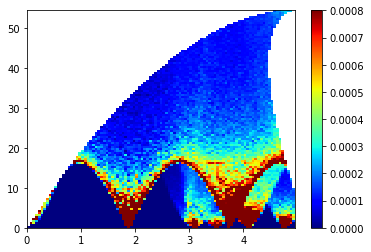

In [15]:
H.plot(IQEhist_Ei_55_T_300, min=0, max=8e-4, cmap='jet')

# Ei=125

In [16]:
%%time
IQEhist_Ei_125_T_300, mphiqe = use_phonopy.from_FORCE_CONSTANTS(
    datadir,
    Ei = 125., # meV                                                                                                                                                                                                                                         
    T=300., # kelvin                                                                                                                                                                                                                                         
    doshist = doshist, # DOS histogram     
    Q_bins = np.arange(0, 7.5, 0.05), E_bins = np.arange(0, 120, 1.),
    workdir = '_tmp.graphite-Ei_125-T_300', N=int(1e6), include_multiphonon=True,
    max_det_angle=60.,
)

Running phonopy...  * Discarding negative freqencies
* Fixing polarizations
Done

100%|██████████| 12/12 [00:09<00:00,  1.28it/s]


CPU times: user 31min 30s, sys: 49min 10s, total: 1h 20min 40s
Wall time: 7min 11s


In [19]:
IQEhist_Ei_125_T_300 += mphiqe

plot z in (0, 0.001)


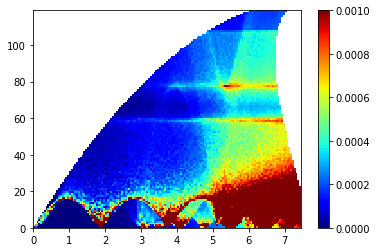

In [20]:
H.plot(IQEhist_Ei_125_T_300, min=0, max=1e-3, cmap='jet')

# Ei=300

In [21]:
%%time
from mcvine.phonon.powderSQE import use_phonopy
IQEhist,mphiqe = use_phonopy.from_FORCE_CONSTANTS(
    datadir,
    Ei = 300., # meV                                                                                                                                                                                                                                         
    T=300., # kelvin                                                                                                                                                                                                                                         
    doshist = doshist, # DOS histogram     
    Q_bins = np.arange(0, 23, 0.1), E_bins = np.arange(0, 250, 1),
    workdir = '_tmp.graphite-Ei_300-T_300', N=int(1e6), include_multiphonon=True
)

Running phonopy...  * Discarding negative freqencies
* Fixing polarizations
Done

100%|██████████| 12/12 [00:10<00:00,  1.10it/s]


CPU times: user 29min 31s, sys: 50min 7s, total: 1h 19min 38s
Wall time: 7min 9s


plot z in (0, 0.0035)


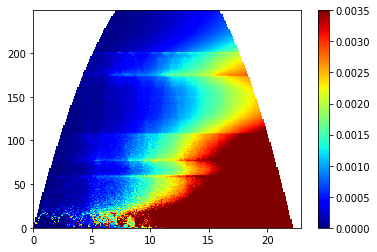

In [24]:
H.plot(IQEhist+mphiqe, min=0, max=3.5e-3, cmap='jet')

## Experimental

In [26]:
expiqe = hh.load("../tests/data/graphite/expiqe_300meV.h5")

/home/lj7/miniconda2/envs/dev-mcvine-new/lib/python2.7/site-packages/histogram/hdf/Loader.py:129: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'storage' in list(dataGroup): # this uses the 'storage' convention


In [29]:
%matplotlib notebook

<IPython.core.display.Javascript object>


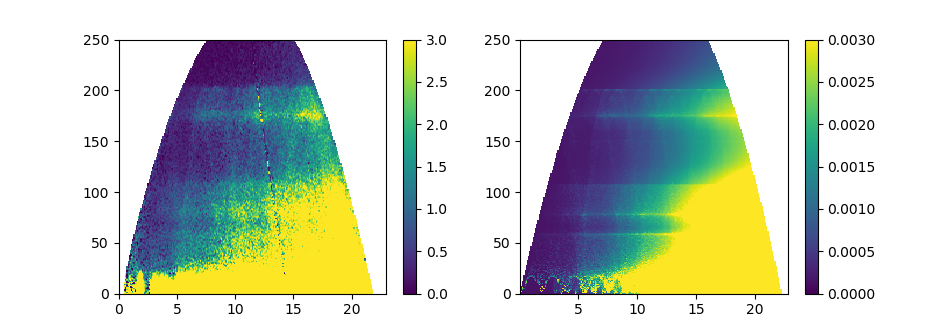

(0, 250)

In [30]:
from multiphonon import sqe as mpsqe
plt.figure(figsize=(9.5,3.3))
plt.subplot(1,2,1)
mpsqe.plot(expiqe)
plt.ylim(0, None)
plt.clim(0, 3)
plt.ylim(0, 250)
plt.subplot(1,2,2)
mpsqe.plot(IQEhist+mphiqe + (0.00015,0))
plt.clim(0, .003)
plt.ylim(0, 250)